# THOMAS NGO
# TEVIN VU

# 1. Use read_csv() to load and examine each dataset.

In [2]:
# read dataset 1
import io
import pandas as pd

path = "dataset1.csv"
df1 = pd.read_csv(path, header=None)
df1.columns = ["x1", "x2", "y"]
df1

,x1,x2,y
0,1.800539,-0.539218,0
1,24.330831,26.439146,1
2,21.124114,21.166814,1
3,10.517197,11.175424,0
4,19.737721,23.341138,1
...,...,...,...
195,7.701944,5.303327,0
196,24.079743,24.066883,1
197,24.351346,20.908176,1
198,24.688063,24.996258,1


In [3]:
# read dataset 2
import io
import pandas as pd

path = "dataset2.csv"
df2 = pd.read_csv(path, header=None)
df2.columns = ["x1", "x2", "y"]
df2

,x1,x2,y
0,-1.664407,17.245415,0
1,20.211237,8.599145,1
2,12.675218,23.148375,1
3,17.552831,10.311698,1
4,14.959941,20.225844,1
...,...,...,...
195,14.648641,18.261043,1
196,15.618267,10.398619,1
197,18.280171,9.001519,1
198,13.415497,6.349741,1


In [4]:
# read dataset 3
import io
import pandas as pd

path = "dataset3.csv"
df3 = pd.read_csv(path, header=None)
df3.columns = ["x1", "x2", "y"]
df3

,x1,x2,y
0,30.876149,7.806793,0
1,34.060953,14.802478,0
2,30.860440,16.270849,0
3,21.738646,10.306756,1
4,17.664476,30.921761,1
...,...,...,...
195,8.029149,17.007334,1
196,11.341650,18.551593,1
197,29.313882,2.027670,0
198,8.122641,20.294774,1


# 2. Use logistic regression to fit() and score() a binary classifier for dataset 1. How accurate are the model’s predictions?

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np
y1 = df1['y']
X1 = df1[['x1','x2']]
clf1 = LogisticRegression(random_state=0).fit(X1, y1)
print('r-score of dataset 1 =', clf1.score(X1,y1))

r-score of dataset 1 = 1.0


## How accurate are the model’s predictions?
The model's predictions are pretty good

# 3. Repeat experiment (2) for dataset 2. How well does it score?

In [6]:
y2 = df2['y']
X2 = df2[['x1','x2']]
clf2 = LogisticRegression(random_state=0).fit(X2, y2)
print('r-score of dataset 2 =', clf2.score(X2,y2))

r-score of dataset 2 = 0.525


## How well does it score?
dataset 2 scores worse than dataset 1. Only 52.5 % of data can be used to explain the relationship between data and targets

# 4. Create scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1. What accounts for the discrepancies between experiments (2) and (3)?

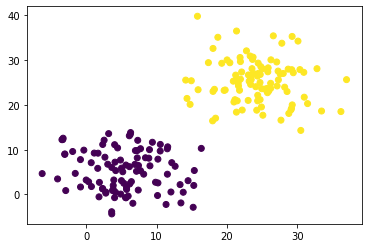

In [7]:
import pylab as plt
plt.scatter(X1['x1'], X1['x2'], c=y1)

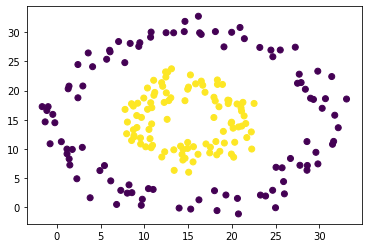

In [8]:
plt.scatter(X2['x1'], X2['x2'], c=y2)

## What accounts for the discrepancies between experiments (2) and (3)?
The R-score for dataset is 1.0. That means that we have 100% data explaining the relationship between features and target in dataset 1. In other words, given a data point, we may have 100% chance to tell if that point is classified to belong to class 0 or class 1. On the other hand, the score of dataset 2 is only 0.525 which means we only have 52.5% chance to classify a point. Besides, imagine that we draw a diagonal line to segregate the data. We can clearly see that the data points are separated into two different regions for dataset 1. But for data set 2, only half of data is separated on both sides. That means that if we use logistic regression for dataset 2, we can only classify half of the data. 

## 5. Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. How well do these classifiers score compared to logistic regression?

In [9]:
from sklearn.naive_bayes import GaussianNB
# calculate R-score for dataset 1 using  Gaussian Naive Bayes
gnb1 = GaussianNB()
gnb1.fit(X1, y1)
print("R-score of dataset 1 = ", gnb1.score(X1, y1))
      
# calculate R-score for dataset 2 using  Gaussian Naive Bayes
gnb2 = GaussianNB()
gnb2.fit(X2, y2)
print("R-score of dataset 2 = ", gnb2.score(X2, y2))

R-score of dataset 1 =  1.0
R-score of dataset 2 =  1.0


## How well do these classifiers score compared to logistic regression?
We observe that the score for dataset 1 is the same on both approaches. However, for dataset 2, we notice that the score of dataset 2 is actually improved. In other words, the Guassian Naive Bayes performs better than logistic regression. That means that if we use Guassian Naive Bayes classifiers for dataset 2, it will be able to tell us a given point belong to which class. 

# 6. Repeat experiment (5) with K-Nearest Neighbor classifiers.


In [10]:
from sklearn.neighbors import KNeighborsClassifier
# calculate R-score for dataset 1
neigh1 = KNeighborsClassifier()
neigh1.fit(X1, y1)
print("R-score of dataset 1 = ", neigh1.score(X1, y1))

# calculate R-score for dataset 2
neigh2 = KNeighborsClassifier()
neigh2.fit(X2, y2)
print("R-score of dataset 2 = ", neigh2.score(X2, y2))

R-score of dataset 1 =  1.0
R-score of dataset 2 =  1.0


## How well do these classifiers score compared to logistic regression?
The K-nearest neighbor classifiers performs better than logistic regression classifiers. Same explanation as shown in previous question.

# 7. Using the second half of the Python code for Figure 9.2 - Simple Gaussian Naive Bayes Classification from Statistics, Data Mining, and Machine Learning in Astronomy, 2nd Edition as a guide, plot the decision boundaries for each classifier and dataset. What differences do you observe?

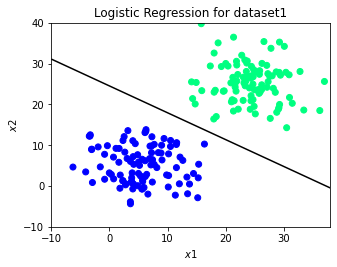

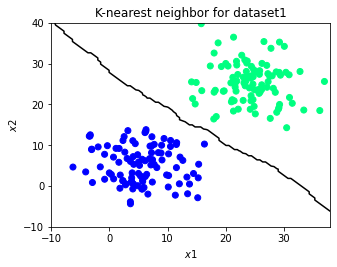

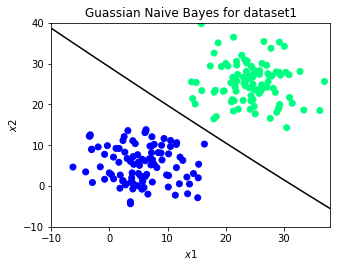

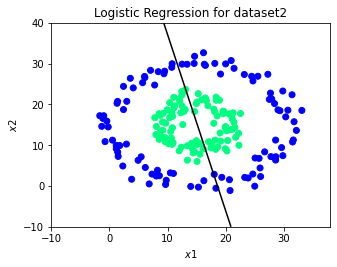

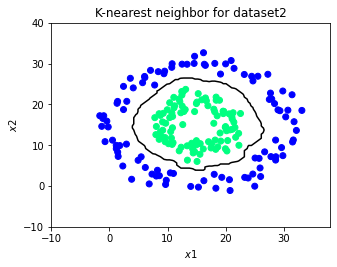

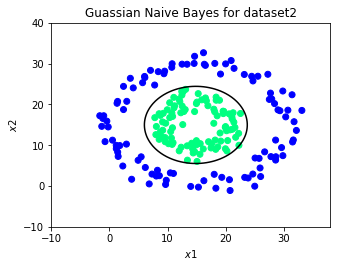

In [11]:
from collections import OrderedDict
clf_map = OrderedDict()
data_map = OrderedDict()
# predict the classification probabilities on a grid
xlim = (-10, 38)
ylim = (-10, 40)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

clf_map = {
    'dataset1': {
        'Logistic Regression': clf1,
        'K-nearest neighbor': neigh1,
        'Guassian Naive Bayes': gnb1,
    },
    'dataset2': {
        'Logistic Regression': clf2,
        'K-nearest neighbor': neigh2,
        'Guassian Naive Bayes': gnb2,
    }
}

data_map = {
    'dataset1': [X1, y1],
    'dataset2': [X2, y2],
}

for k, v in data_map.items():
    for name, clf in clf_map[k].items():   
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, 1].reshape(xx.shape)

        fig = plt.figure(figsize=(5, 3.75))
        ax = fig.add_subplot(111)
        ax.scatter(v[0]['x1'], v[0]['x2'], c=v[1], cmap=plt.cm.winter, zorder=2)

        ax.contour(xx, yy, Z, [0.5], colors='k')

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.set_xlabel('$x1$')
        ax.set_ylabel('$x2$')
        ax.set_title(name + ' for ' + k)
        
        plt.show()

## What differences do you observe?
The differences that we observe are that all classifiers separate the data very well for dataset 1. For dataset 2, the logistic regression is not cut in half and each side have mix color. That means it does not perform well. Furthermore, we also notice that the Guassian Naive Bayes and logistic regression have smooth contour. But, KNN contour is more wiggly than the others.

# 8. Now repeat experiments (2), (5), (6), and (7) with dataset 3. 

In [12]:
#Use logistic regression to fit() and score() a binary classifier for dataset 3. How accurate are the model’s predictions?
import io
import pandas as pd
import numpy as np
#load dataset 3
path3 = "dataset3.csv"
data3 = pd.read_csv(path3, header=None)
data3.columns = ["x1", "x2", "y"]
from sklearn.linear_model import LogisticRegression
X3 = data3[['x1', 'x2']]
y3 = data3['y']
clf3 = LogisticRegression(random_state=0).fit(X3, y3)

clf3.score(X3,y3)


0.87

## How accurate are the model’s predictions?
The score is close to 1. So, the model's predictions is still good.

In [13]:
#Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. How well do these classifiers score compared to logistic regression?
#dataset3
from sklearn.naive_bayes import GaussianNB
gnb3 = GaussianNB()
gnb3fit = GaussianNB().fit(X3,y3)
print(gnb3fit.score(X3,y3))

0.885


## How well do these classifiers score compared to logistic regression?
Since the score of Guassian Naive Bayes is greater than the score of logistic regression. We think that the Gaussian Naive Bayes classifier performs better the one using logistic regression

In [17]:
# Repeat experiment (5) with K-Nearest Neighbor classifiers.
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 10)
knn3 = neigh.fit(X3,y3)
print(knn3.score(X3,y3))

1.0


## How well do these classifiers score compared to logistic regression?
K-nearest neighbor classifers performs better than logistic regression classifers.

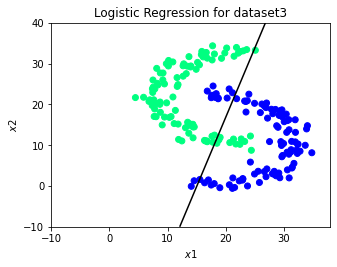

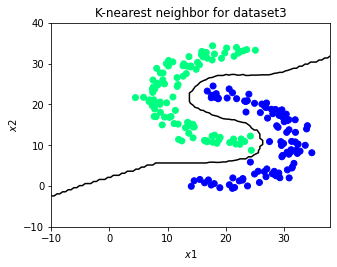

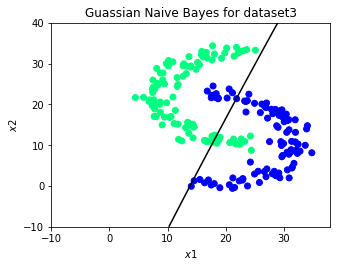

In [15]:
from collections import OrderedDict
clf_map = OrderedDict()
data_map = OrderedDict()
# predict the classification probabilities on a grid
xlim = (-10, 38)
ylim = (-10, 40)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

clf_map = {
    'dataset3': {
        'Logistic Regression': clf3,
        'K-nearest neighbor': knn3,
        'Guassian Naive Bayes': gnb3fit
    }
}

data_map = {
    'dataset3': [X3, y3]
}

for k, v in data_map.items():
    for name, clf in clf_map[k].items():   
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, 1].reshape(xx.shape)

        fig = plt.figure(figsize=(5, 3.75))
        ax = fig.add_subplot(111)
        ax.scatter(v[0]['x1'], v[0]['x2'], c=v[1], cmap=plt.cm.winter, zorder=2)

        ax.contour(xx, yy, Z, [0.5], colors='k')

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.set_xlabel('$x1$')
        ax.set_ylabel('$x2$')
        ax.set_title(name + ' for ' + k)
        
        plt.show()

## What differences do you observe?
Base on the decision boundaries for each classifier and dataset, K-nearest Neighbor's decision boundaries did pretty well. Logistic Regression and Gaussian Naive Bayes's decision boundaries did ok as their score. Gaussian Naive Bayes's decision boundary did a little bit better than Logistic Regression's decision boundary. 